## Default of credit card clients dataset

### source : https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('default of credit card clients.csv') #reading the dataset 

### Undertanding data and pre processing

In [3]:
data.head() #looking at first few records

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


Here if we observe the data, there are unnamed attributes.we need our first row ( with 0 index) to be the header 

In [73]:
new_header=data.iloc[0] #Grabs the first row for the header
data=data[1:] #takes the data without header row
data.columns=new_header #set the header row as the data header

In [5]:
data.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Now the data is in proper format

In [6]:
data.shape # checking dimensions of data

(30000, 25)

In [7]:
data.drop('ID',axis=1,inplace=True) #dropping ID column

In [8]:
data.shape

(30000, 24)

In [9]:
data.dtypes #checking data type of each column

0
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

Type conversions are required

In [10]:
cat_col=["default payment next month"] #categorical column

In [11]:
data[cat_col]=data[cat_col].astype('category')

In [12]:
data.dtypes

0
LIMIT_BAL                       object
SEX                             object
EDUCATION                       object
MARRIAGE                        object
AGE                             object
PAY_0                           object
PAY_2                           object
PAY_3                           object
PAY_4                           object
PAY_5                           object
PAY_6                           object
BILL_AMT1                       object
BILL_AMT2                       object
BILL_AMT3                       object
BILL_AMT4                       object
BILL_AMT5                       object
BILL_AMT6                       object
PAY_AMT1                        object
PAY_AMT2                        object
PAY_AMT3                        object
PAY_AMT4                        object
PAY_AMT5                        object
PAY_AMT6                        object
default payment next month    category
dtype: object

In [13]:
num_cols=data.select_dtypes(exclude=['category']).columns # Numerical column

In [16]:
data[num_cols]=data[num_cols].astype('int64')

In [17]:
data.dtypes

0
LIMIT_BAL                        int64
SEX                              int64
EDUCATION                        int64
MARRIAGE                         int64
AGE                              int64
PAY_0                            int64
PAY_2                            int64
PAY_3                            int64
PAY_4                            int64
PAY_5                            int64
PAY_6                            int64
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default payment next month    category
dtype: object

All the columns are rightly converted

In [22]:
data.isnull().sum().sum() # checking for any missing values 

0

 NO missing values in the data !!!

In [23]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### EDA

In [25]:
import seaborn as sns

In [28]:
import matplotlib.pyplot as plt

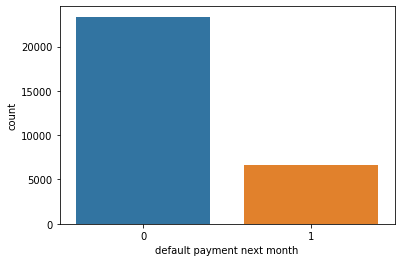

In [26]:
y_count=sns.countplot(x='default payment next month',data=data) #looking at target variable distribution

Looks like it is an imbalanced data

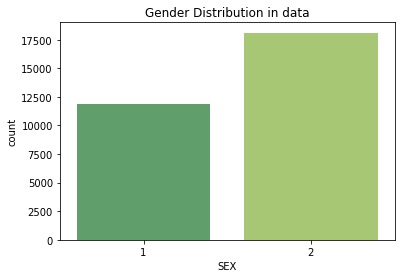

In [29]:
#looking at gender distribution
sns.countplot(data['SEX'],palette='summer')
plt.title("Gender Distribution in data");

1 refers to male 
2 refers to female 
There are more female data samples tan male

Age distribution according to default payment next month


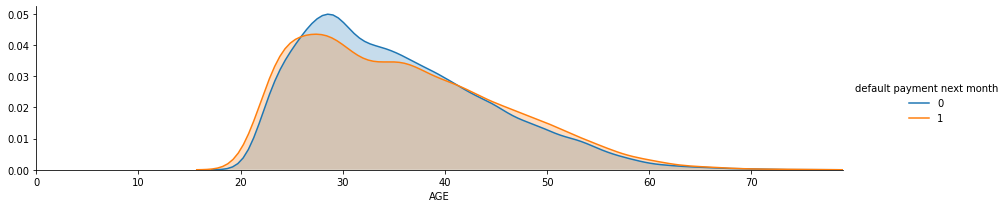

In [35]:
print("Age distribution according to default payment next month")
facetgrid = sns.FacetGrid(data,hue="default payment next month",aspect = 4)
facetgrid.map(sns.kdeplot,"AGE",shade = True)
facetgrid.set(xlim = (0,data["AGE"].max()))
facetgrid.add_legend();

### Splitting data into Train and Test sets

In [36]:
#seperating target variable from the train data
X= data.drop(['default payment next month'], axis = 1)
y= data["default payment next month"]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
#checking for target column distribution
print(pd.value_counts(y_train)/y_train.count() * 100)

print(pd.value_counts(y_test) /y_test.count() * 100)

0    77.733333
1    22.266667
Name: default payment next month, dtype: float64
0    78.222222
1    21.777778
Name: default payment next month, dtype: float64


In [76]:
#loading import libraries that we might use in model building
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [43]:
from xgboost import XGBClassifier

### Standardization

In [45]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train_num = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_test_num = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols)

Before building a model, scaling the data is a very important step

In [46]:
X_train_num.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.563914,0.806489,-1.076818,-1.053818,0.487684,-1.759539,-1.558129,-1.534656,-1.522407,-1.528914,...,-0.676308,-0.674219,-0.665072,-0.657278,-0.334158,-0.237820,-0.286287,-0.303704,-0.306697,-0.295508
1,-0.906109,0.806489,-1.076818,0.861717,-1.354775,-0.872930,-0.724841,-0.697092,-0.667580,-0.646969,...,-0.643113,-0.599093,-0.502942,-0.646122,-0.183068,-0.145394,-0.022842,0.305068,-0.265029,-0.127272
2,-0.906109,0.806489,0.186488,-1.053818,0.054164,1.786897,1.775022,1.815598,1.896903,0.234975,...,0.032999,0.076353,0.055141,-0.063506,-0.334158,-0.050658,-0.286287,-0.179343,-0.085730,-0.295508
3,0.254436,0.806489,1.449794,-1.053818,2.005003,5.333332,4.274884,3.490726,2.751731,1.998864,...,0.835234,0.930802,1.010764,-0.657278,-0.334158,-0.237820,-0.286287,-0.303704,-0.306697,-0.295508
4,0.563914,-1.239943,-1.076818,-1.053818,-0.054216,-0.872930,-0.724841,-0.697092,0.187248,-0.646969,...,-0.361686,-0.406551,-0.444155,-0.274249,-0.214555,0.630972,-0.224816,0.529960,1.130978,0.992796


### Model Building

### XG Boost

In [49]:
XGB_model = XGBClassifier(n_estimators=400, gamma=0.5,learning_rate=0.1)
%time XGB_model.fit(X_train, y_train)

[16:50:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 26 s, sys: 332 ms, total: 26.3 s
Wall time: 6.77 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
y_pred_train = XGB_model.predict(X_train)
y_pred_test = XGB_model.predict(X_test)

In [51]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9004285714285715
Test Accuracy: 0.8156666666666667


Here, the train accuracy is good but test accuracy is comparitively not good

In [66]:
# finding best parameters through cross validation
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.6, 0.8, 2),
     'n_estimators':[100,200],
     'max_depth': [5, 10]
}

CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 10)

let's fit the best parameters

In [67]:
%time CV_XGB.fit(X = X_train, y=y_train)

[18:23:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:23:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:23:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:23:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [68]:
# Find best model
best_xgb_model = CV_XGB.best_estimator_
print (CV_XGB.best_score_, CV_XGB.best_params_)

0.8165714285714285 {'colsample_bytree': 0.6, 'max_depth': 5, 'n_estimators': 100}


In [69]:
best_xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
y_pred_train=best_xgb_model.predict(X_train)
y_pred_test=best_xgb_model.predict(X_test)

In [71]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.8572380952380952
Test Accuracy: 0.8177777777777778


In [72]:
print(confusion_matrix(y_test, y_pred_test))

[[6651  389]
 [1251  709]]


### CONCLUSION

##### Train accuracy is 85.7% and test accuracy is 81.7% 

### This model can predict the new test data with an accuracy of 81.7%